In [1]:
import geopandas
import matplotlib.pyplot as plt
import missingno as msn
import numpy as np
import pandas as pd
import seaborn as sns
from shapely.geometry import Point

country = geopandas.read_file("data/topo_eer.json")
country.head()

,id,EER13CD,EER13CDO,EER13NM,geometry
0,E15000001,E15000001,01,North East,"MULTIPOLYGON (((-1.22485 54.6254, -1.22485 54...."
1,E15000002,E15000002,02,North West,"MULTIPOLYGON (((-3.20559 53.37173, -3.2035 53...."
2,E15000003,E15000003,03,Yorkshire and The Humber,"MULTIPOLYGON (((-0.55419 53.69064, -0.5469 53...."
3,E15000004,E15000004,04,East Midlands,"MULTIPOLYGON (((0.26851 52.81527, 0.26435 52.8..."
4,E15000005,E15000005,05,West Midlands,"POLYGON ((-1.84344 53.17818, -1.84448 53.17818..."


In [7]:
country["EER13NM"].unique()

array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'Eastern', 'London',
       'South East', 'South West', 'Scotland', 'Wales'], dtype=object)

<Axes: >

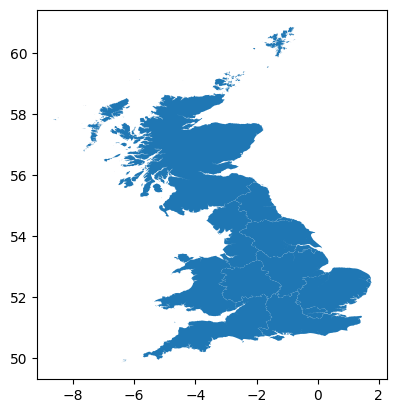

In [2]:
country.plot()

In [3]:
sensitive_en = geopandas.read_file(
    "data/Environmentally_Sensitive_Areas_England.json"
)
sensitive_en.head()

,id,ref_code,name,measure,desig_date,hotlink,gdb_geomattr_data,geometry
0,Environmentally_Sensitive_Areas_England.1,LD,LAKE DISTRICT,245392.663,1993,http://webarchive.nationalarchives.gov.uk/2014...,None,"POLYGON ((-3.02275 54.74444, -3.02303 54.74428..."
1,Environmentally_Sensitive_Areas_England.2,NP,NORTH PEAK,54979.468,1988,http://webarchive.nationalarchives.gov.uk/2014...,None,"POLYGON ((-1.93211 53.60334, -1.93226 53.60333..."
2,Environmentally_Sensitive_Areas_England.3,SP,SOUTH WEST PEAK,33838.840,1993,http://webarchive.nationalarchives.gov.uk/2014...,None,"POLYGON ((-1.97359 53.3105, -1.97325 53.31064,..."
3,Environmentally_Sensitive_Areas_England.4,BK,BRECKLAND,94535.287,1988,http://webarchive.nationalarchives.gov.uk/2014...,None,"POLYGON ((0.57299 52.63977, 0.57306 52.63986, ..."
4,Environmentally_Sensitive_Areas_England.5,CL,CLUN,21362.967,1988,http://webarchive.nationalarchives.gov.uk/2014...,None,"POLYGON ((-3.02386 52.4878, -3.02376 52.4878, ..."


In [62]:
sensitive_sc = geopandas.read_file(
    "data/Environmentally_Sensitive_Areas_Scotland.gml"
)
sensitive_sc.head()

,gml_id,OBJECTID,ESACODE,ESAName,Areaha,st_area_shape_,st_length_shape_,geometry
0,EnvironmentallySensitiveAreas.1,1,1,Central Southern Uplands,272133.3,2.721333e+09,395253.131017,"MULTIPOLYGON (((348904.43 632360.69, 348931.01..."
1,EnvironmentallySensitiveAreas.2,2,2,Western Southern Uplands,252425.1,2.524251e+09,406061.954509,"MULTIPOLYGON (((283859.08 605285.99, 283910.15..."
2,EnvironmentallySensitiveAreas.3,3,3,Cairngorm Straths,218481.7,2.184817e+09,418081.968837,"MULTIPOLYGON (((290000 825894.16, 290323.36 82..."
3,EnvironmentallySensitiveAreas.4,4,4,Loch Lomond,49088.9,4.908885e+08,164085.332373,"MULTIPOLYGON (((229578.078 703787.063, 229589...."
4,EnvironmentallySensitiveAreas.5,5,5,Breadalbane,179275.9,1.792759e+09,292907.093483,"MULTIPOLYGON (((252450.77 750000, 252449.99 75..."


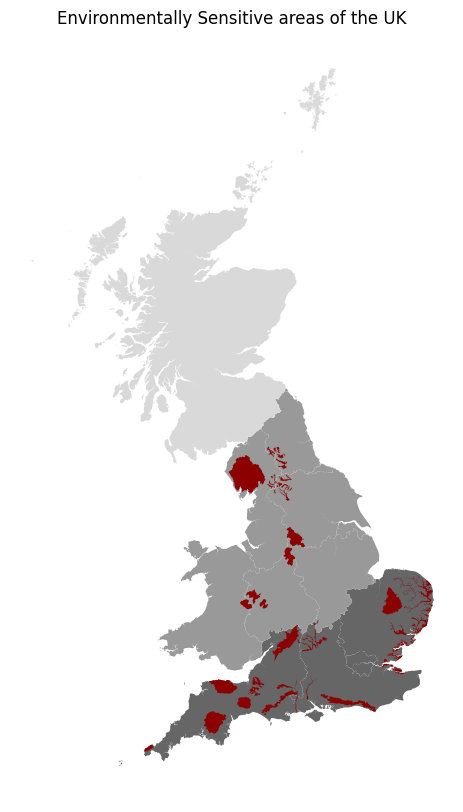

In [64]:
fig, ax = plt.subplots(1, figsize=(20, 10))
south = country[
    country["EER13NM"].isin(["South East", "South West", "Eastern", "London"])
].plot(ax=ax, color="#666")
north = country[
    country["EER13NM"].isin(
        ["South East", "South West", "Eastern", "London", "Scotland"]
    )
    == False
].plot(ax=ax, color="#999")
scotland = country[country["EER13NM"].isin(["Scotland"])].plot(
    ax=ax, color="#d9d9d9"
)

sensitive_en.plot(ax=south, color="darkred")

_ = ax.axis("off")
ax.set_title("Environmentally Sensitive areas of the UK", fontsize=12)
plt.savefig("Sensitive_areas.png", bbox_inches="tight");